In [1]:
import numpy as np 
import pandas as pd
from datetime import datetime
import ast
import time
from datetime import timedelta
from datetime import datetime as dt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
df =pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/PolitikiProstasiaFinalClean07062021.tsv", sep='\t')

In [3]:
df

,Unnamed: 0,title,date,body,url,year,month,day
0,0,Ισχυρές βροχές και καταιγίδες προβλέπονται σήμ...,2021-06-11,"Αθήνα, 11 Ιουνίου 2021 Σύμφωνα με το Έκτακτο Δ...",https://www.civilprotection.gr/el/ishyres-vroh...,2021,6,11
1,1,Νίκος Χαρδαλιάς από τη Θεσσαλονίκη: «Από Δευτέ...,2021-06-12,"Αθήνα, 12 Ιουνίου 2021 Ολοκληρώθηκε η επίσκεψη...",https://www.civilprotection.gr/el/simantika-th...,2021,6,12
2,2,Επιχείρηση «Δρυάδες» από την Πολιτική Προστασί...,2021-06-11,"Αθήνα, 11 Ιουνίου 2021 Ξεκινά τη Δευτέρα η Επι...",https://www.civilprotection.gr/el/simantika-th...,2021,6,11
3,3,Αντιπυρική περίοδος 2021 - Συνέντευξη Τύπου - ...,2021-06-15,"Αθήνα, 15 Ιουνίου 2021 Πραγματοποιήθηκε σήμερα...",https://www.civilprotection.gr/el/simantika-th...,2021,6,15
4,4,"Δεν παίζουμε με τη φωτιά, γιατί η φωτιά δεν πα...",2021-06-11,"Αθήνα, 11 Ιουνίου 2021 Μπορούμε να σβήσουμε ...",https://www.civilprotection.gr/el/simantika-th...,2021,6,11
...,...,...,...,...,...,...,...,...
544,544,Σε έξι γλώσσες η ενημέρωση της Γενικής Γραμματ...,NaN,"/el/file/grpngΑθήνα, 27 Φεβρουαρίου 2020 ...",https://www.civilprotection.gr/el/simantika-th...,0,0,0
545,545,Τεχνικός Σύμβουλος της Γενικής Γραμματείας Πολ...,NaN,"Αθήνα, 18 Φεβρουαρίου 2020 Ο Γενικός Γραμ...",https://www.civilprotection.gr/el/simantika-th...,0,0,0
546,546,Έμφαση στην πρόληψη - Σύσκεψη του γγΠΠ Νίκου Χ...,NaN,"Αθήνα, 24 Φεβρουαρίου 2020 Σήμερα, Δευτέρ...",https://www.civilprotection.gr/el/emfasi-stin-...,0,0,0
547,547,Επίσκεψη γγΠΠ Νίκου Χαρδαλιά στον Βόλο – Συσκέ...,NaN,"Αθήνα, 16 Φεβρουαρίου 2020 Ο Γενικός Γραμμ...",https://www.civilprotection.gr/el/simantika-th...,0,0,0


In [5]:
df.dtypes

Unnamed: 0     int64
title         object
date          object
body          object
url           object
year           int64
month          int64
day            int64
dtype: object

In [4]:
df.drop(['Unnamed: 0'], axis='columns', inplace=True)

In [5]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')

In [138]:
df.dtypes

title            object
date     datetime64[ns]
body             object
url              object
year              int64
month             int64
day               int64
dtype: object

In [10]:
df.isnull().sum()

title      0
date     131
body       0
url        0
year       0
month      0
day        0
dtype: int64

In [ ]:
#df[df['date'].notna()]

In [12]:
df['title'].str.contains("Χαρδαλιά").value_counts()

False    345
True     204
Name: title, dtype: int64

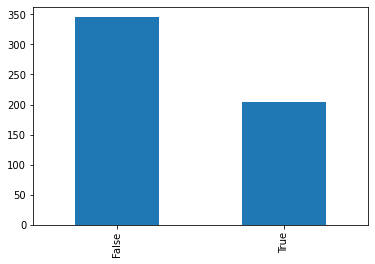

In [14]:
df['title'].str.contains("Χαρδαλιά").value_counts().plot(kind = "bar")

In [13]:
df['title'].str.contains('αντιπυρική').value_counts()

False    531
True      18
Name: title, dtype: int64

In [20]:
df['title'].str.contains('πυρκαγιά').value_counts()

False    517
True      32
Name: title, dtype: int64

In [15]:
df['title'].str.contains('σεισμική').value_counts()

False    546
True       3
Name: title, dtype: int64

In [16]:
df['title'].str.contains('εμβολιαστικό').value_counts()

False    543
True       6
Name: title, dtype: int64

In [17]:
df['title'].str.contains('112').value_counts()

False    543
True       6
Name: title, dtype: int64

In [18]:
df['title'].str.contains('Αττική').value_counts()

False    521
True      28
Name: title, dtype: int64

In [19]:
df['title'].str.contains('βροχές').value_counts()

False    501
True      48
Name: title, dtype: int64

In [23]:
df['title'].str.contains('χιονοπτώσεις').value_counts()

False    537
True      12
Name: title, dtype: int64

In [24]:
df['title'].str.contains('κακοκαιρία').value_counts()

False    539
True      10
Name: title, dtype: int64

In [130]:
df['body'].str.contains('ώρες').value_counts()

False    329
True     220
Name: body, dtype: int64

# Συνέντευξη τύπου για κορονοϊό

In [6]:
df_covid = df[(df['title'].str.contains("Ενημέρωση")) & (df['title'].str.contains("συντακτών")) | (df['title'].str.contains("δημοσιογράφων"))]
df_covid

,title,date,body,url,year,month,day
5,Ενημέρωση διαπιστευμένων συντακτών από τον Υπο...,2021-06-09,"Αθήνα, 09 Ιουνίου 2021 ΣΥΝΤΟΝΙΣΤΗΣ: Κυρίες και...",https://www.civilprotection.gr/el/simantika-th...,2021,6,9
6,Ενημέρωση συντακτών από Υφυπουργό Πολιτικής Πρ...,2021-06-11,"Αθήνα, 11 Ιουνίου 2021 ΣΥΝΤΟΝΙΣΤΗΣ: Καλησπέρα ...",https://www.civilprotection.gr/el/enimerosi-sy...,2021,6,11
17,Ενημέρωση διαπιστευμένων συντακτών από τον Υφυ...,2021-06-04,"Αθήνα, 04 Ιουνίου 2021 ΣΥΝΤΟΝΙΣΤΗΣ: Καλησπέρα ...",https://www.civilprotection.gr/el/simantika-th...,2021,6,4
19,Ενημέρωση διαπιστευμένων συντακτών από τον Υφυ...,NaT,"Αθήνα, 28 Μαΐου 2021 ΣΥΝΤΟΝΙΣΤΗΣ: Καλησπέρα σα...",https://www.civilprotection.gr/el/simantika-th...,0,0,0
35,Ενημέρωση διαπιστευμένων συντακτών από τον Υφυ...,NaT,"Αθήνα, 14 Μαΐου 2021 ΣΥΝΤΟΝΙΣΤΗΣ: Καλησπέρα ...",https://www.civilprotection.gr/el/simantika-th...,0,0,0
...,...,...,...,...,...,...,...
517,Ενημέρωση διαπιστευμένων συντακτών υγείας από ...,2020-03-24,"Αθήνα, 24 Μαρτίου 2020 Ν. ΧΑΡΔΑΛΙΑΣ: Καλησπέρα...",https://www.civilprotection.gr/el/enimerosi-di...,2020,3,24
520,Ενημέρωση διαπιστευμένων συντακτών υγείας από ...,2020-03-17,"Αθήνα, 17 Μαρτίου 2020 Ν. ΧΑΡΔΑΛΙΑΣ: Καλησπέ...",https://www.civilprotection.gr/el/enimerosi-di...,2020,3,17
525,Ενημέρωση διαπιστευμένων συντακτών υγείας από ...,2020-03-16,"Αθήνα, 16 Μαρτίου 2020 Νίκος Χαρδαλιάς: “………...",https://www.civilprotection.gr/el/enimerosi-di...,2020,3,16
528,Ενημέρωση διαπιστευμένων συντακτών υγείας από ...,NaT,"Αθήνα, 19 Μαρτίου 2020 Ν. ΧΑΡΔΑΛΙΑΣ: Καλησπέρα...",https://www.civilprotection.gr/el/enimerosi-di...,0,0,0


In [55]:
df_covid['title'].str.contains("Χαρδαλιά").value_counts()

True    68
Name: title, dtype: int64

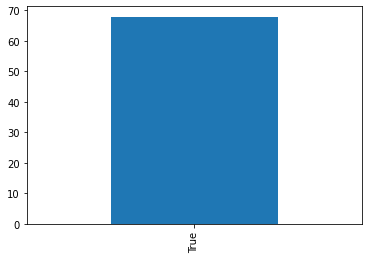

In [111]:
df_covid['title'].str.contains("Χαρδαλιά").value_counts().plot(kind='bar')

In [56]:
df_covid['title'].str.contains("Τσιόδρα").value_counts()

False    50
True     18
Name: title, dtype: int64

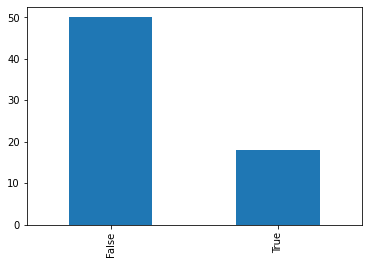

In [57]:
df_covid['title'].str.contains("Τσιόδρα").value_counts().plot(kind='bar')

In [46]:
df_covid['title'].str.contains("Κικίλια").value_counts()

False    65
True      3
Name: title, dtype: int64

In [47]:
df_covid['title'].str.contains("Κεραμέως").value_counts()

False    66
True      2
Name: title, dtype: int64

In [48]:
df_covid['title'].str.contains("Μαγιορκίνη").value_counts()

True     41
False    27
Name: title, dtype: int64

In [49]:
df_covid['title'].str.contains("Παπαευαγγέλου").value_counts()

False    39
True     29
Name: title, dtype: int64

In [36]:
#df_covid['χαρδαλιάς'] = df_covid['title'].str.contains("Χαρδαλιά")

In [106]:
df_covid[df_covid['date'].isnull()]

,title,date,body,url,year,month,day
19,Ενημέρωση διαπιστευμένων συντακτών από τον Υφυ...,NaT,"Αθήνα, 28 Μαΐου 2021 ΣΥΝΤΟΝΙΣΤΗΣ: Καλησπέρα σα...",https://www.civilprotection.gr/el/simantika-th...,0,0,0
35,Ενημέρωση διαπιστευμένων συντακτών από τον Υφυ...,NaT,"Αθήνα, 14 Μαΐου 2021 ΣΥΝΤΟΝΙΣΤΗΣ: Καλησπέρα ...",https://www.civilprotection.gr/el/simantika-th...,0,0,0
46,Ενημέρωση διαπιστευμένων συντακτών από τον Υφυ...,NaT,"Αθήνα, 07 Μαΐου 2021 ΣΥΝΤΟΝΙΣΤΗΣ: Καλησπέρα σα...",https://www.civilprotection.gr/el/simantika-th...,0,0,0
138,Ενημέρωση συντακτών από Υφυπουργό Πολιτικής Πρ...,NaT,"Αθήνα, 22 Ιανουαρίου 2021 ΣΥΝΤΟΝΙΣΤΗΣ: Καλησπέ...",https://www.civilprotection.gr/el/simantika-th...,0,0,0
174,Ενημέρωση συντακτών από τον Υφυπουργό Πολιτική...,NaT,"Αθήνα, 22 Δεκεμβρίου 2020 ΣΥΝΤΟΝΙΣΤΗΣ: Καλησπέ...",https://www.civilprotection.gr/el/enimerosi-sy...,0,0,0
178,Ενημέρωση συντακτών από τον Υφυπουργό Πολιτική...,NaT,"Αθήνα, 18 Δεκεμβρίου 2020 ΣΥΝΤΟΝΙΣΤΗΣ: Καλησπέ...",https://www.civilprotection.gr/el/simantika-th...,0,0,0
251,Ενημέρωση συντακτών από τον Υφυπουργό Πολιτική...,NaT,"Αθήνα, 20 Οκτωβρίου 2020 ΣΥΝΤΟΝΙΣΤΗΣ: Καλησπέρ...",https://www.civilprotection.gr/el/simantika-th...,0,0,0
254,Ενημέρωση συντακτών από τον Υφυπουργό Πολιτική...,NaT,"Αθήνα, 16 Οκτωβρίου 2020 ΣΥΝΤΟΝΙΣΤΗΣ: Καλησπέ...",https://www.civilprotection.gr/el/simantika-th...,0,0,0
266,Ενημέρωση συντακτών από τον Υφυπουργό Πολιτική...,NaT,"Αθήνα, 13 Οκτωβρίου 2020 ΣΥΝΤΟΝΙΣΤΗΣ: Καλησπέ...",https://www.civilprotection.gr/el/enimerosi-sy...,0,0,0
268,Ενημέρωση συντακτών από τον Υφυπουργό Πολιτική...,NaT,"Αθήνα, 09 Οκτωβρίου 2020 ΣΥΝΤΟΝΙΣΤΗΣ: Καλησπέ...",https://www.civilprotection.gr/el/simantika-th...,0,0,0


In [7]:
df_covid_dates=df_covid[df_covid['date'].notna()]

In [108]:
#df_covid_dates

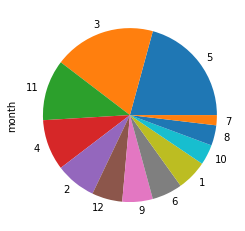

In [86]:
df_covid_dates["month"].value_counts().plot(kind="pie", y='month')

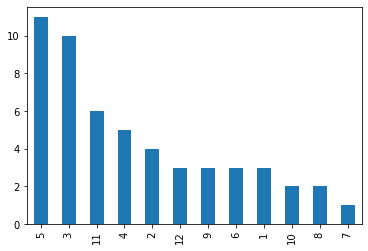

In [54]:
df_covid_dates["month"].value_counts().plot(kind='bar')

In [95]:
df_covid_dates["year"].value_counts()

2020    33
2021    20
Name: year, dtype: int64

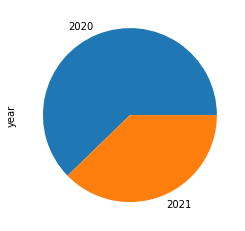

In [88]:
df_covid_dates["year"].value_counts().plot(kind="pie", y='year')

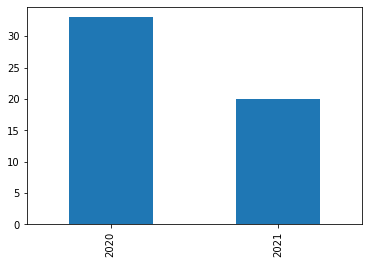

In [55]:
df_covid_dates["year"].value_counts().plot(kind='bar')

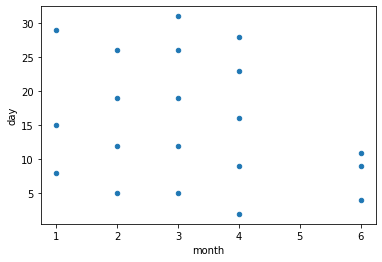

In [96]:
df_covid_dates[df_covid_dates['year']==2021].plot.scatter(x="month", y="day")

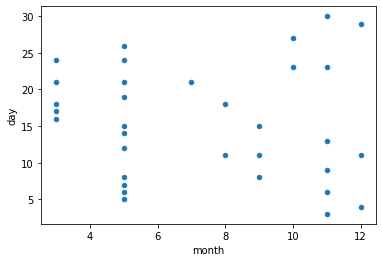

In [97]:
df_covid_dates[df_covid_dates['year']==2020].plot.scatter(x="month", y="day")

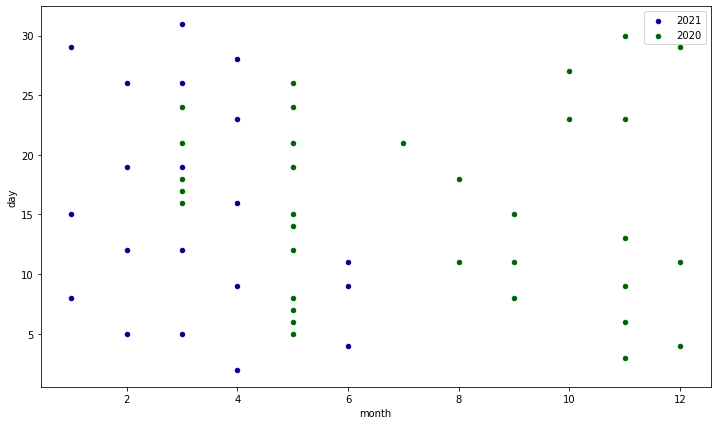

In [101]:
ax= df_covid_dates[df_covid_dates['year']==2021].plot.scatter(x="month", y="day", color="DarkBlue", label="2021")
df_covid_dates[df_covid_dates['year']==2020].plot.scatter(x="month", y="day", color="DarkGreen", label ="2020", ax=ax, figsize=(12,7))

In [60]:
#df_covid_dates.set_index('date' , inplace=True)

In [73]:
#df_covid_dates

In [8]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [14]:
text = df_covid['body'].str.cat(sep = ' ').replace("amp", ' ')

In [9]:
import spacy

In [143]:
!python -m spacy download el_core_news_sm

     |████████████████████████████████| 11.4MB 6.1MB/s 
  Created wheel for el-core-news-sm: filename=el_core_news_sm-2.2.5-cp37-none-any.whl size=11422785 sha256=c29d01109fffc1efd5c488dd44548431bc97f6b9f35c32750ef0ac395ea2a797
  Stored in directory: /tmp/pip-ephem-wheel-cache-1nzx_x1d/wheels/70/a1/c5/6690d6b524d87e287a8070cf957f834fb1b1665b9ede11348b
Successfully built el-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [10]:
nlp = spacy.load('el_core_news_sm')

In [85]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Vectorization

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [17]:
count_vector = cv.fit_transform(df_covid['body'])

In [18]:
count_vector.shape

(68, 17770)

In [19]:
# cv.get_feature_names()

results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

,00,000,001,004,006,007,009,01,010,015,018,019,02,022,026,03,030,031,032,035,036,038,04,040,042,043,044,047,05,052,054,056,06,061,062,065,067,07,073,076,...,ότου,όφελος,όφελός,όχημα,όχι,όψει,όψη,όψιν,ύδρας,ύλες,ύπαιθρο,ύπαρξη,ύπαρξης,ύπνος,ύποπτα,ύποπτες,ύποπτο,ύποπτου,ύποπτους,ύποπτων,ύπουλη,ύπουλο,ύπουλος,ύστατη,ύστερα,ύφασμα,ύφεση,ύφεσης,ύψιστη,ύψιστης,ύψιστο,ύψος,ύψους,ώρα,ώρας,ώρες,ώσεις,ώση,ώσης,ώστε
0,3,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,2
1,1,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,2,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,2,0,0,0,4
2,2,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2,0,0,0,0,0,2
3,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,3,0,0,0,5
4,1,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,4


In [21]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.1, max_df=0.95)

In [22]:
count_vector = cv.fit_transform(df_covid['body'])

In [23]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

,00,06,07,10,100,11,112,116,12,13,13033,134,14,15,150,16,17,18,19,1η,20,200,2020,2021,21,22,23,24,24ωρα,24ωρο,25,250,26,27,28,29,30,300,31,32,...,χρησιμοποιούνται,χρησιμοποιώντας,χριστούγεννα,χρονιά,χρονική,χρονικό,χρόνια,χρόνο,χρόνος,χρόνου,χτες,χωριό,χωρών,χώρας,χώρες,χώρο,χώροι,χώρος,χώρου,χώρους,χώρων,ψυχική,ωράριο,ωραρίου,ωρών,όντως,όπλα,όπλο,όργανα,όρια,όριο,όρο,όρος,όρους,όφελος,ύπαρξη,ύφεση,ύψους,ώρα,ώρες
0,3,0,0,2,6,1,0,0,5,0,0,1,1,7,0,2,0,0,0,2,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,3,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,5,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,1,1,0
1,1,0,1,1,1,3,0,0,2,0,0,0,3,6,1,3,1,1,4,0,0,1,0,1,0,1,0,2,1,0,1,0,0,1,1,0,3,0,1,1,...,0,2,0,0,0,2,0,1,0,0,0,0,0,6,4,2,0,0,0,3,0,0,0,2,1,0,0,0,0,0,0,2,1,0,2,0,3,0,0,2
2,2,1,0,2,6,1,1,0,2,4,0,0,2,4,0,1,0,2,1,0,1,3,1,1,1,0,0,1,1,1,0,0,0,1,1,0,2,0,0,0,...,1,0,0,0,0,0,0,2,0,0,0,0,0,9,1,2,0,0,0,3,0,0,0,0,2,0,0,2,0,0,0,4,3,1,0,0,2,0,2,0
3,0,0,0,0,5,0,0,0,2,2,0,0,0,3,2,2,0,2,3,0,3,1,0,2,0,0,0,2,1,1,5,0,1,0,1,0,0,1,4,0,...,0,0,0,0,0,2,1,2,0,0,0,0,0,7,1,3,0,0,0,4,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,1,3
4,1,0,0,1,2,3,0,0,0,0,1,0,7,2,0,0,2,0,0,0,1,0,0,1,2,0,1,2,1,0,0,0,1,0,1,0,2,0,0,0,...,0,0,0,0,0,1,1,0,0,0,0,0,0,9,3,1,0,1,0,1,0,0,0,0,4,0,1,1,0,1,1,0,0,0,1,0,1,0,1,0


In [24]:
from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [26]:
 cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(df_covid['body'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπας', 'αλλιώτικο', 'αλλοιώτικο', 'αφότο', 'βεβαιότατο', 'γρήγορας', 'δίχω', 'εαυτός', 'εκάστο', 'ετέρο', 'ετού', 'ευθύ', 'εχτής', 'ιδίο', 'κάμποσε', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνε', 'ολωσδιόλο', 'ολόγυρο', 'ορισμένο', 'ορισμένος', 'ορισμένω', 'ποία', 'ποιέ', 'ποιώ', 'πολλός', 'προχθή', 'προχτέ', 'πόσε', 'πόσο', 'σει', 'στος', 'συχνά', 'συχνέ', 'ταύτε', 'ταύτο', 'όποιας'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,,,,,"+1,8%",-70,-από,-καθορίζομαι,-και,-πάντα,-σε,-τέλο,-τη,-την,-τος,-των,...,0%.,"0,05%","0,1%","0,12%.","0,13%","0,14%.","0,15%","0,2%","0,22%","0,23%.","0,29%","0,30%","0,33","0,35%.","0,36%","0,4","0,4%","0,4%.","0,5","0,5%","0,52%","0,55%","0,56",...,όρου,όρους,όροφο,όσφρηση,όφελο,όφελος,όφελό,όχημα,όψει,όψη,όψιν,ύδρας,ύλες,ύπαιθρο,ύπαρξη,ύπνος,ύποπτα,ύποπτες,ύποπτο,ύποπτος,ύποπτους,ύπουλη,ύπουλο,ύπουλος,ύστατη,ύφασμος,ύφεση,ύψιστη,ύψιστος,ύψο,ύψου,ύψους,ώρα,ώρες,ώρος,ώσει,ώση,–βήμας,•την,•όλες
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,2,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,3,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
max_features=16

In [27]:
 cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, max_features=16, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(df_covid['body'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπας', 'αλλιώτικο', 'αλλοιώτικο', 'αφότο', 'βεβαιότατο', 'γρήγορας', 'δίχω', 'εαυτός', 'εκάστο', 'ετέρο', 'ετού', 'ευθύ', 'εχτής', 'ιδίο', 'κάμποσε', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνε', 'ολωσδιόλο', 'ολόγυρο', 'ορισμένο', 'ορισμένος', 'ορισμένω', 'ποία', 'ποιέ', 'ποιώ', 'πολλός', 'προχθή', 'προχτέ', 'πόσε', 'πόσο', 'σει', 'στος', 'συχνά', 'συχνέ', 'ταύτε', 'ταύτο', 'όποιας'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,αττικός,αύξηση,βλέπω,εβδομάδα,εμβόλιο,ενότητα,επίπεδο,επιδημιολογικός,επιτροπή,κρουσμάτο,πανδημία,παραμένω,περιοχή,περιφερειακός,τεστ,χρήση
0,1,2,3,4,15,1,3,4,7,2,8,3,0,1,2,1
1,2,5,5,17,9,6,10,9,15,4,9,7,6,7,5,1
2,3,8,3,15,3,9,11,7,8,12,4,4,13,11,2,3
3,1,6,3,7,4,3,4,8,11,9,5,3,5,3,2,8
4,1,6,6,19,6,2,0,8,6,7,7,5,5,2,16,15


In [28]:
results.sum(axis =0).sort_values(ascending = False)

περιοχή            747
εβδομάδα           728
επίπεδο            701
τεστ               568
πανδημία           501
περιφερειακός      493
επιτροπή           468
αύξηση             442
αττικός            435
ενότητα            423
κρουσμάτο          402
παραμένω           375
επιδημιολογικός    361
βλέπω              360
χρήση              342
εμβόλιο            338
dtype: int64

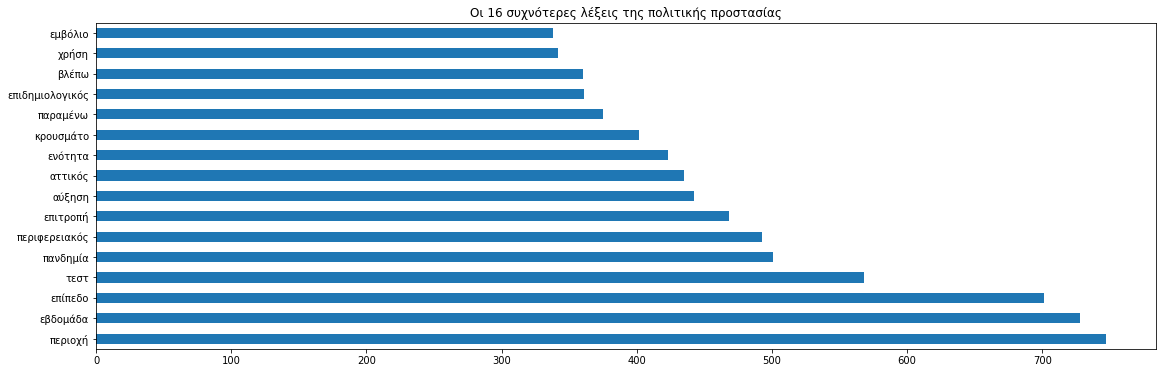

In [30]:
results.sum(axis =0).sort_values(ascending = False).plot(kind='barh', figsize =(19,6), title="Οι 16 συχνότερες λέξεις της πολιτικής προστασίας")

In [31]:
 cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, max_features=16, ngram_range=(2, 2), tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(df_covid['body'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπας', 'αλλιώτικο', 'αλλοιώτικο', 'αφότο', 'βεβαιότατο', 'γρήγορας', 'δίχω', 'εαυτός', 'εκάστο', 'ετέρο', 'ετού', 'ευθύ', 'εχτής', 'ιδίο', 'κάμποσε', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνε', 'ολωσδιόλο', 'ολόγυρο', 'ορισμένο', 'ορισμένος', 'ορισμένω', 'ποία', 'ποιέ', 'ποιώ', 'πολλός', 'προχθή', 'προχτέ', 'πόσε', 'πόσο', 'σει', 'στος', 'συχνά', 'συχνέ', 'ταύτε', 'ταύτο', 'όποιας'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,αυξημένος κινδύνο,διασπορά ιού,ενεργά κρούσματας,εντατικός θεραπεία,επίπεδο αυξημένος,επιδημιολογικό φορτίο,επιδημιολογικός εικόνα,κυρία παπαευαγγέλο,μονάδα εντατικός,νέος κρούσματας,περιφερειακός ενότητα,προηγούμενη εβδομάδα,συντονιστη ευχαριστούμε,σύστημα υγεία,υπουργείο υγεία,χρήση μάσκα
0,0,0,0,0,0,0,2,0,0,0,1,0,2,0,5,1
1,0,4,1,1,0,2,6,3,1,7,6,2,3,1,2,0
2,0,4,2,1,0,3,3,4,1,5,9,3,3,1,3,3
3,0,2,3,2,0,0,2,0,2,0,3,4,2,2,3,4
4,0,5,0,2,0,1,4,6,2,4,2,4,3,3,3,2


In [32]:
results.sum(axis =0).sort_values(ascending = False)

περιφερειακός ενότητα      400
ενεργά κρούσματας          263
σύστημα υγεία              223
εντατικός θεραπεία         178
υπουργείο υγεία            171
χρήση μάσκα                167
συντονιστη ευχαριστούμε    138
κυρία παπαευαγγέλο         137
επιδημιολογικό φορτίο      136
αυξημένος κινδύνο          134
μονάδα εντατικός           122
προηγούμενη εβδομάδα       115
νέος κρούσματας            114
διασπορά ιού               110
επίπεδο αυξημένος          108
επιδημιολογικός εικόνα     107
dtype: int64

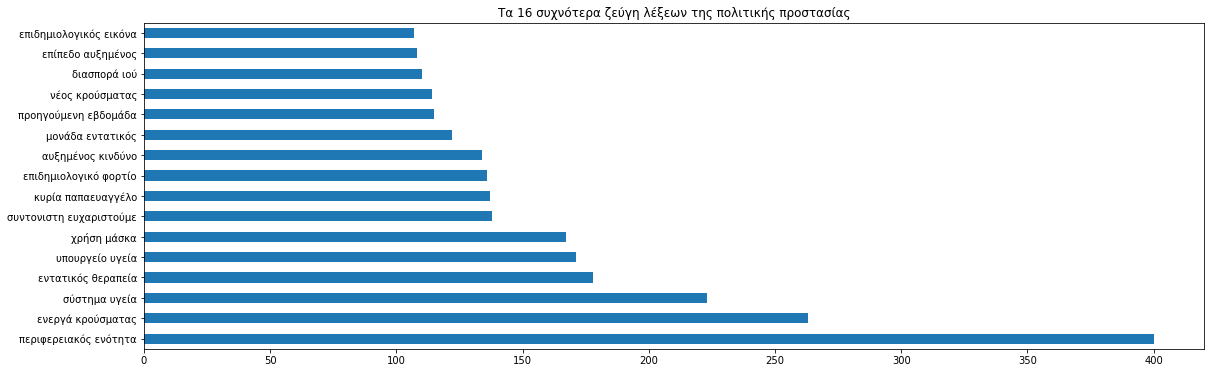

In [33]:
results.sum(axis =0).sort_values(ascending = False).plot(kind='barh', figsize =(19,6), title="Tα 16 συχνότερα ζεύγη λέξεων της πολιτικής προστασίας")

In [126]:
 cv = CountVectorizer( min_df=0.01, max_df=0.95, max_features=16, ngram_range=(3, 3))
 count_vector = cv.fit_transform(df_covid['body'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

,από το υπουργείο,αυτή τη στιγμή,θα ήθελα να,θα πρέπει να,καλησπέρα σας από,μονάδες εντατικής θεραπείας,σε κάθε περίπτωση,σε σχέση με,σε τι αφορά,σε όλη την,στη χώρα μας,στο σύστημα υγείας,τα ενεργά κρούσματα,την προηγούμενη εβδομάδα,της περιφερειακής ενότητας,το υπουργείο υγείας
0,2,0,0,0,2,0,1,1,0,0,0,0,0,0,0,3
1,2,1,5,7,2,1,2,3,0,1,5,1,0,2,0,2
2,2,2,4,3,2,1,2,2,0,4,4,1,0,3,1,2
3,2,1,3,13,2,2,0,5,1,0,3,2,2,4,0,2
4,2,2,3,4,2,2,1,1,2,2,3,2,0,3,0,2


In [164]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
                     vocabulary = ['κυβέρνηση', 'καραντίνα','lockdown','ώρα','εμβόλιο','εμβολιασμός']) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df_covid['body'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

,κυβέρνηση,καραντίνα,lockdown,ώρα,εμβόλιο,εμβολιασμός
0,3,0,0,1,8,6
1,0,0,2,0,4,1
2,0,0,0,2,2,5
3,0,0,0,1,4,1
4,1,0,0,1,6,5


In [165]:
results.sum(axis =0).sort_values(ascending = False)

εμβόλιο        214
lockdown       172
ώρα             90
εμβολιασμός     79
κυβέρνηση       77
καραντίνα       37
dtype: int64

In [197]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=10, token_pattern = '\\bεμβ[α-ωά-ώ]λ[α-ωά-ώ]*\\b') #(\\bκ[οω]ρ[οω]ν[α-ωά-ώ]+\\b'), tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df_covid['body'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

,εμβολίου,εμβολίων,εμβολιασμού,εμβολιασμό,εμβολιασμός,εμβολιασμών,εμβολιαστεί,εμβολιαστούν,εμβόλια,εμβόλιο
0,0,1,1,4,6,2,3,4,7,8
1,1,2,5,2,1,4,2,1,5,4
2,0,2,5,7,5,3,3,1,1,2
3,1,1,3,5,1,0,2,1,0,4
4,1,7,5,2,5,0,5,0,0,6


In [198]:
results.shape

(68, 10)

In [199]:
results.sum(axis =0).sum(axis=0)

944

In [200]:
results.sum(axis =0).sort_values(ascending = False)

εμβόλιο         214
εμβόλια         124
εμβολιασμό       87
εμβολιαστεί      85
εμβολιασμού      84
εμβολίου         81
εμβολιασμός      79
εμβολίων         79
εμβολιαστούν     57
εμβολιασμών      54
dtype: int64

In [120]:
 cv = CountVectorizer(vocabulary = ['χαρδαλιά','τσιόδρα','κικίλια','μαγιορκίνη','κεραμέως','παπαευαγγέλου']) #['ΧΑΡΔΑΛΙΑ', 'Τσιόδρα','ΜΑΓΙΟΡΚΙΝΗ','Παπαευαγγέλου','Κεραμέως','Κικίλια'])
 count_vector = cv.fit_transform(df_covid['title'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

,χαρδαλιά,τσιόδρα,κικίλια,μαγιορκίνη,κεραμέως,παπαευαγγέλου
0,1,0,1,0,0,0
1,1,0,0,1,0,1
2,1,0,0,1,0,1
3,1,0,0,1,0,0
4,1,0,0,1,0,1


In [121]:
results.sum(axis =0).sort_values(ascending = False)

χαρδαλιά         68
μαγιορκίνη       41
παπαευαγγέλου    29
τσιόδρα          18
κικίλια           3
κεραμέως          2
dtype: int64

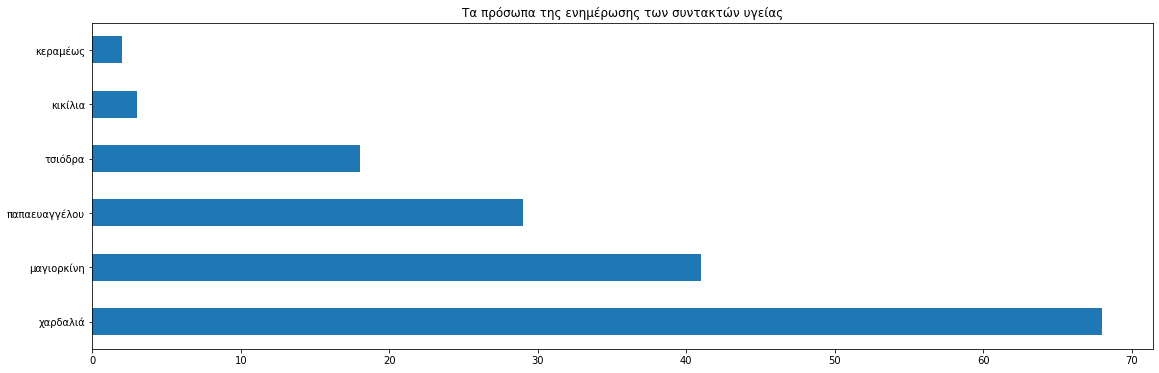

In [117]:
results.sum(axis =0).sort_values(ascending = False).plot(kind='barh', figsize =(19,6), title="Tα πρόσωπα της ενημέρωσης των συντακτών υγείας")

# Cosine Similarity

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [89]:
tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(df_covid['body'])  #finds the tfidf score with normalization

In [90]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
results.head()

,00,000,10,100,11,12,13,14,15,17,18,19,20,200,2020,24,25,30,300,40,50,500,60,65,70,covid,lockdown,self,sms,test,testing,άνθρωποι,άνοιγμα,άρση,άτομα,έδειξε,έλεγχο,έλεγχοι,έξαρση,έρχονται,...,υγειονομικών,υγιεινής,υπάρξει,υπάρχει,υπάρχουν,υπηρεσίες,υπομονή,υπουργέ,υπουργείο,υπουργείου,υπουργός,υποχρεωτική,υφυπουργό,φάση,φαίνεται,φεβρουαρίου,φορά,φορές,φορτίο,φορτίου,φτάσει,φυσικά,χαρακτηριστικά,χαρδαλιά,χαρδαλιάς,χαρδαλιας,χθες,χρήση,χρειάζεται,χρειαστεί,χρονικό,χρόνο,χώρα,χώρας,χώρες,χώρο,χώρους,όρος,ώρα,ώρες
0,0.082558,0.216379,0.032287,0.124672,0.022467,0.114146,0.000000,0.021432,0.128931,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020779,0.021102,0.071910,0.021102,0.079399,0.000000,0.054054,0.022829,0.045659,0.036838,0.000000,0.116886,0.0,0.116405,0.000000,0.040925,0.000000,0.050410,0.031363,0.000000,0.000000,0.000000,0.000000,0.026550,...,0.185852,0.000000,0.000000,0.170012,0.079553,0.02655,0.0,0.102313,0.052864,0.071910,0.073112,0.023580,0.000000,0.020463,0.000000,0.0,0.017112,0.061388,0.000000,0.000000,0.026550,0.052177,0.000000,0.059549,0.020463,0.060056,0.045659,0.017112,0.018975,0.000000,0.024371,0.000000,0.000000,0.086824,0.000000,0.000000,0.034225,0.050410,0.021102,0.000000
1,0.021327,0.179667,0.012511,0.016103,0.052236,0.035384,0.000000,0.049827,0.085645,0.019871,0.017138,0.055434,0.000000,0.017412,0.000000,0.031236,0.016103,0.049060,0.000000,0.049060,0.030766,0.032206,0.104727,0.053077,0.035384,0.042823,0.034824,0.090584,0.0,0.112764,0.024418,0.000000,0.000000,0.019533,0.048611,0.000000,0.068552,0.000000,0.000000,0.000000,...,0.041152,0.000000,0.018887,0.047911,0.024661,0.00000,0.0,0.015858,0.027312,0.000000,0.000000,0.000000,0.016103,0.031716,0.058821,0.0,0.053047,0.000000,0.051414,0.039067,0.000000,0.000000,0.000000,0.015383,0.015858,0.011636,0.000000,0.013262,0.014705,0.000000,0.037773,0.016871,0.200692,0.080744,0.049322,0.035959,0.039785,0.019533,0.000000,0.035384
2,0.040017,0.168561,0.023475,0.090647,0.016336,0.033197,0.068578,0.031165,0.053567,0.000000,0.032157,0.013002,0.013195,0.049007,0.013796,0.014653,0.000000,0.030685,0.000000,0.030685,0.028865,0.090647,0.039301,0.000000,0.000000,0.026784,0.000000,0.169971,0.0,0.148112,0.000000,0.044634,0.000000,0.000000,0.045606,0.000000,0.048236,0.016868,0.000000,0.000000,...,0.019304,0.000000,0.017719,0.101137,0.046273,0.00000,0.0,0.014878,0.025624,0.034856,0.000000,0.017145,0.015108,0.000000,0.013796,0.0,0.024884,0.000000,0.048236,0.018326,0.038608,0.000000,0.034289,0.043297,0.029756,0.032749,0.016599,0.037326,0.013796,0.016079,0.000000,0.031656,0.099681,0.113629,0.011568,0.033736,0.037326,0.054978,0.030685,0.000000
3,0.000000,0.184017,0.000000,0.082465,0.000000,0.036241,0.037433,0.000000,0.043859,0.000000,0.035106,0.042582,0.043215,0.017833,0.000000,0.031993,0.082465,0.000000,0.019026,0.016749,0.094534,0.049479,0.000000,0.036241,0.036241,0.087719,0.000000,0.185556,0.0,0.161692,0.000000,0.032484,0.020352,0.000000,0.062235,0.000000,0.052659,0.000000,0.021074,0.021074,...,0.084297,0.018121,0.038688,0.147214,0.063145,0.00000,0.0,0.016242,0.027974,0.019026,0.019344,0.018717,0.016493,0.016242,0.015061,0.0,0.013583,0.000000,0.000000,0.040012,0.021074,0.000000,0.000000,0.031511,0.032484,0.059586,0.000000,0.108663,0.000000,0.000000,0.038688,0.034558,0.108821,0.096482,0.012629,0.055245,0.054331,0.020006,0.016749,0.054362
4,0.019924,0.089521,0.011688,0.030088,0.048800,0.000000,0.000000,0.108618,0.026671,0.037128,0.000000,0.000000,0.013140,0.000000,0.000000,0.029182,0.000000,0.030556,0.000000,0.030556,0.014371,0.015044,0.000000,0.000000,0.000000,0.093348,0.000000,0.169254,0.0,0.147488,0.022813,0.000000,0.000000,0.036497,0.045414,0.018564,0.048033,0.000000,0.019223,0.000000,...,0.019223,0.000000,0.000000,0.044760,0.023039,0.00000,0.0,0.014815,0.038274,0.017355,0.017645,0.068289,0.015044,0.000000,0.027476,0.0,0.049558,0.014815,0.016011,0.018249,0.000000,0.000000,0.017072,0.028743,0.014815,0.021741,0.049586,0.161065,0.027476,0.016011,0.017645,0.000000,0.099261

In [157]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with other three elements

cosine scores ==>  [[1.         0.54682444 0.55363715 ... 0.46060353 0.36084297 0.30877916]
 [0.54682444 1.         0.79484007 ... 0.42579088 0.41697166 0.41843604]
 [0.55363715 0.79484007 1.         ... 0.4392004  0.38629976 0.36516929]
 ...
 [0.46060353 0.42579088 0.4392004  ... 1.         0.50952308 0.51254961]
 [0.36084297 0.41697166 0.38629976 ... 0.50952308 1.         0.57400089]
 [0.30877916 0.41843604 0.36516929 ... 0.51254961 0.57400089 1.        ]]


In [158]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

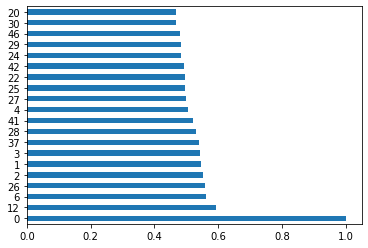

In [161]:
pd.DataFrame(arr).loc[0].sort_values( ascending = False).head(20).plot(kind = 'barh')

In [105]:
df_covid['body'].iloc[3]

'Αθήνα, 28 Μαΐου 2021 ΣΥΝΤΟΝΙΣΤΗΣ: Καλησπέρα σας από το Υπουργείο Υγείας Ξεκινά η ενημέρωση από τον Υφυπουργό Πολιτικής Προστασίας και Διαχείρισης Κρίσεων Νίκο Χαρδαλιά και τον Επίκουρο Καθηγητή Επιδημιολογίας και μέλος της Επιτροπής Εμπειρογνώμων Γκίκα Μαγιορκίνη. Στην ενημέρωση συμμετέχει και ο Αναπληρωτής Υπουργός Υγείας Βασίλης Κοντοζαμάνης, προκειμένου να απαντά σε ερωτήματα που αφορούν στο σύστημα Υγείας. Κύριε Μαγιορκίνη, έχετε το λόγο. ΓΚ. ΜΑΓΙΟΡΚΙΝΗΣ: Καλησπέρα σας. Μέχρι σήμερα έχουν καταγραφεί 170.000.000 μολύνσεις και περισσότεροι από 3.500.000 θάνατοι με νόσο COVID-19 σε παγκόσμια κλίμακα. Ο ρυθμός των νέων διαγνώσεων συνέχισε να πέφτει, να μειώνεται και τώρα καταγράφονται περίπου 500.000 ανά ημέρα. Ο ρυθμός των θανάτων υποχωρεί σε λιγότερους από 13.000 ανά ημέρα. Η επιδημία στην Ευρώπη την τελευταία εβδομάδα συνέχισε να βελτιώνεται, καταγράφοντας 24% μείωση στις διαγνώσεις και 20% στους θανάτους μεσοσταθμικά. Πιο συγκεκριμένα, ο ρυθμός των νέων διαγνώσεων υποχωρεί σε λιγό

In [155]:
df_covid['body'].iloc[2]

'Αθήνα, 04 Ιουνίου 2021 ΣΥΝΤΟΝΙΣΤΗΣ: Καλησπέρα σας από το Υπουργείο Υγείας. Ξεκινά η ενημέρωση από τον Υφυπουργό Πολιτικής Προστασίας και Διαχείρισης Κρίσεων Νίκο Χαρδαλιά, την Καθηγήτρια Παιδιατρικής Λοιμωξιολογίας και μέλος της Επιτροπής Εμπειρογνωμόνων Βάνα Παπαευαγγέλου και τον Επίκουρο Καθηγητή Επιδημιολογίας και μέλος της Επιτροπής Εμπειρογνώμων Γκίκα Μαγιορκίνη. Κυρία Παπαευαγγέλου, έχετε το λόγο. Β. ΠΑΠΑΕΥΑΓΓΕΛΟΥ: Καλησπέρα σας. Ο ΕΟΔΥ ανακοίνωσε σήμερα 1.112 νέα κρούσματα κορονοϊού στη χώρα μας, ενώ ο αριθμός των ασθενών που νοσηλεύονται διασωληνωμένοι ανέρχεται σε 445 ασθενείς. Κατά τη διάρκεια των τελευταίων 24 ωρών, 34 συνάνθρωποί μας έχασαν τη ζωή τους. Αναφορικά με την κατανομή των νέων κρουσμάτων στις μεγάλες πόλεις, σήμερα σημειώνουμε 564 νέα κρούσματα στην Αττική και 103 στη Θεσσαλονίκη. Το επιδημιολογικό φορτίο της χώρας εμφανίζει ύφεση σε όλες τις Περιφερειακές Ενότητες της επικράτειας. Την τελευταία εβδομάδα, σύμφωνα με τα στοιχεία του ΕΟΔΥ, διαγνώστηκαν στη χώρα μα

In [131]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train))

cosine scores ==>  [[1.         0.54682444 0.55363715 ... 0.46060353 0.36084297 0.30877916]
 [0.54682444 1.         0.79484007 ... 0.42579088 0.41697166 0.41843604]
 [0.55363715 0.79484007 1.         ... 0.4392004  0.38629976 0.36516929]
 ...
 [0.46060353 0.42579088 0.4392004  ... 1.         0.50952308 0.51254961]
 [0.36084297 0.41697166 0.38629976 ... 0.50952308 1.         0.57400089]
 [0.30877916 0.41843604 0.36516929 ... 0.51254961 0.57400089 1.        ]]


In [132]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

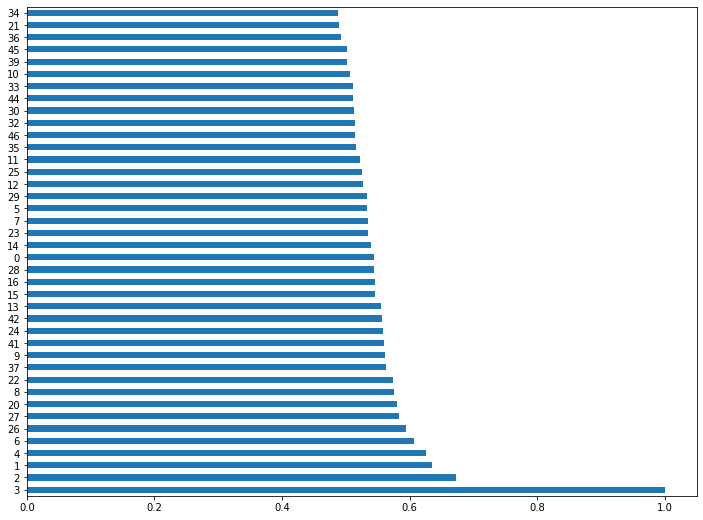

In [133]:
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(40).plot(kind = 'barh', figsize=(12,9))

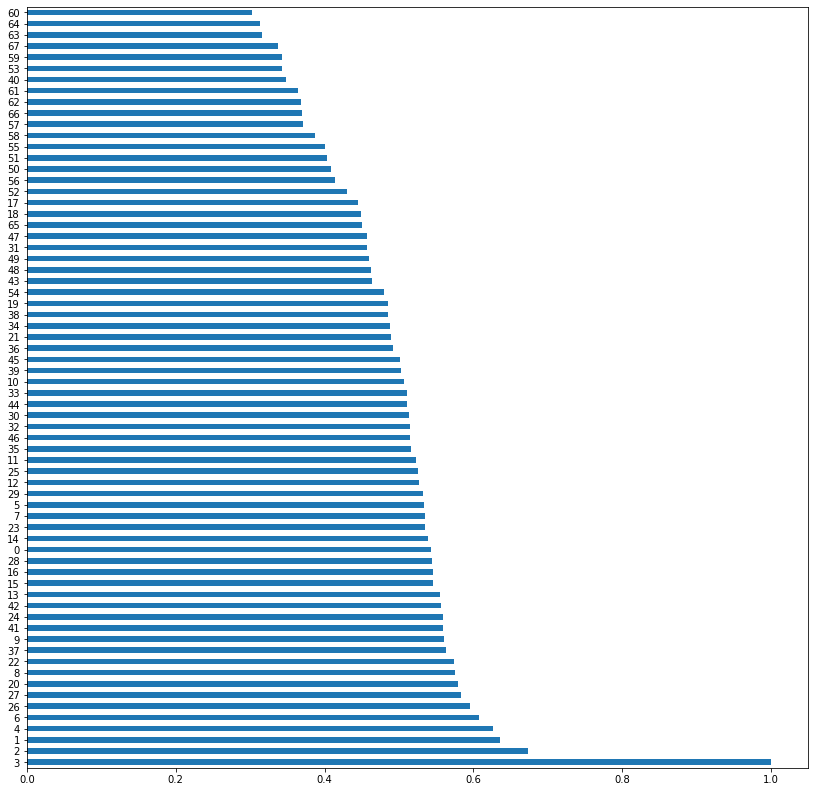

In [136]:
pd.DataFrame(arr).loc[3].sort_values(ascending = False).plot(kind = 'barh', figsize=(14,14))

# Sentiment Analysis

In [15]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True)

In [17]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [18]:
matrix = vec.fit_transform(df_covid_dates['body'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε', 

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,αυτοκινητοδρομος,αυγουστος,βερολινο,βικτωρια,βοστωνη,γαμηλιο ταξιδι,γεννηση παιδιου,γαιδαρος,γατα,γερμανος,γιαννης,γνωστοποιηση,γυαλια,διακοπη,διευθυντρια σχολειου,διδυμοι,δεξαμενη,δευτερα παρουσια,δευτερον,δημοκρατια,διαρκεια ζωης,διαδρομη,διαλογισμος,διεθνες,διευθυνσεις,δραμα,εξαρτηση,εξωτερικου χωρου,επικοινωνω,επιπτωσεις,...,καρυδια,ωχρος,ελλειπων,προϊοντα,δικαιολογημενο,ενταλματα,κρεατοελλια,αποτυχημενος,σπαταλω,τροποι,ξεπερασμενο,αδιαβροχος,παντρευομαι,βοτανισμα,χωρις βαρος,παραξενα,καλωσορισατε,κρασπεδο,χελωνι,ηχηρο κτυπημα,απολυτως,πλατυς,ανθρωπινο ον,ανεξελεγκτη πυρκαγια,απροσδοκητα ευρημα,μαραμενο,αλιμονο,επιδεινωνεται,αποσπω βιαια,καρπος του χεριου,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
2,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
3,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,3,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
# Φτιάξε μια λίστα με positive words

angry_words = emolex_df[emolex_df.Anger == 1]['word']

positive_words = emolex_df[emolex_df.Positive == 1]['word']


# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']


# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']


# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']


# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']


# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']



# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']


# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']



# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

In [20]:
df_covid_dates['anger'] = wordcount_df[angry_words].sum(axis=1)

df_covid_dates['positivity'] = wordcount_df[positive_words].sum(axis=1)


df_covid_dates['joy'] = wordcount_df[joy_words].sum(axis=1)

df_covid_dates['disgust'] = wordcount_df[disgust_words].sum(axis=1)


df_covid_dates['surprise'] = wordcount_df[surprise_words].sum(axis=1)

df_covid_dates['trust'] = wordcount_df[trust_words].sum(axis=1)


df_covid_dates['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)


df_covid_dates['sadness'] = wordcount_df[sadness_words].sum(axis=1)

df_covid_dates['negative'] = wordcount_df[negative_words].sum(axis=1)

df_covid_dates['fear'] = wordcount_df[fear_words].sum(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [21]:
df_covid_dates.set_index('date' , inplace=True)

In [22]:
df_covid_dates['body'].str.len().groupby(by=df_covid_dates.index.month).mean()

date
1     42645.333333
2     38542.500000
3     24014.700000
4     37003.200000
5     16331.000000
6     25301.666667
7     29354.000000
8     32213.500000
9     41617.333333
10    40542.000000
11    28093.833333
12    33663.666667
Name: body, dtype: float64

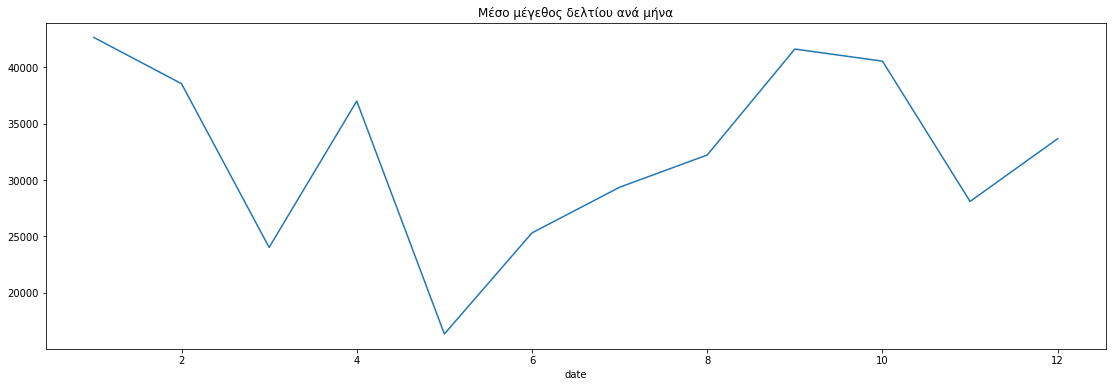

In [23]:
df_covid_dates['body'].str.len().groupby(by=df_covid_dates.index.month).mean().plot(figsize=(19,6),title="Μέσο μέγεθος δελτίου ανά μήνα") 

In [222]:
df_covid_dates['positivity'].sum()

559.0

In [36]:
df_covid_dates['trust'].head(10)

date
2021-06-09    143.0
2021-06-11    145.0
2021-06-04    158.0
2021-04-28      NaN
2021-04-16      NaN
2021-04-23      NaN
2021-04-09      NaN
2021-04-02      NaN
2021-03-26      NaN
2021-03-31      NaN
Name: trust, dtype: float64

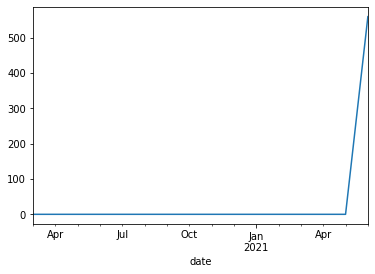

In [37]:
df_covid_dates['positivity'].resample('M').sum().plot() 

In [25]:
df_covid_dates['negative'].sum()

488.0

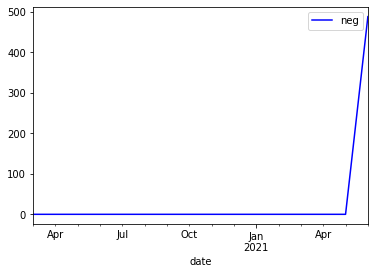

In [26]:
df_covid_dates['negative'].resample('M').sum().plot(color = 'b',label = 'neg').legend() 

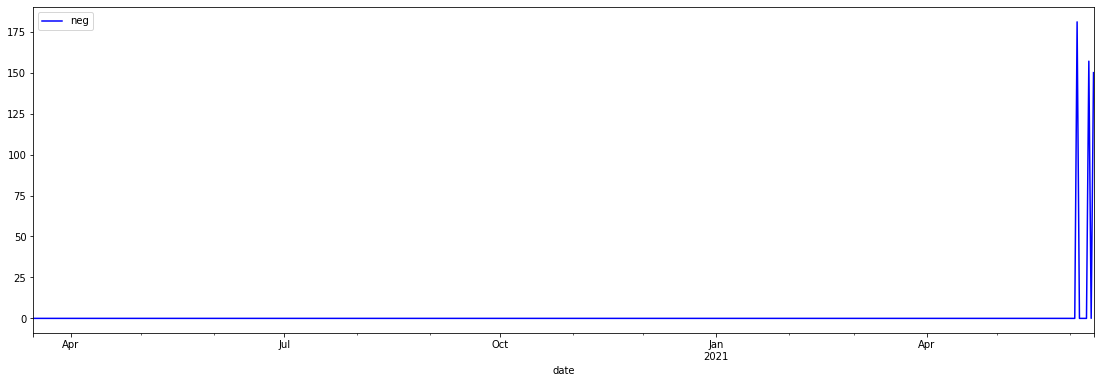

In [228]:
df_covid_dates['negative'].resample('D').sum().plot(figsize=(19,6), color = 'b',label = 'neg').legend() 

Text(0.5, 1.0, 'Σύγκριση συναισθήματος θυμού και χαράς')

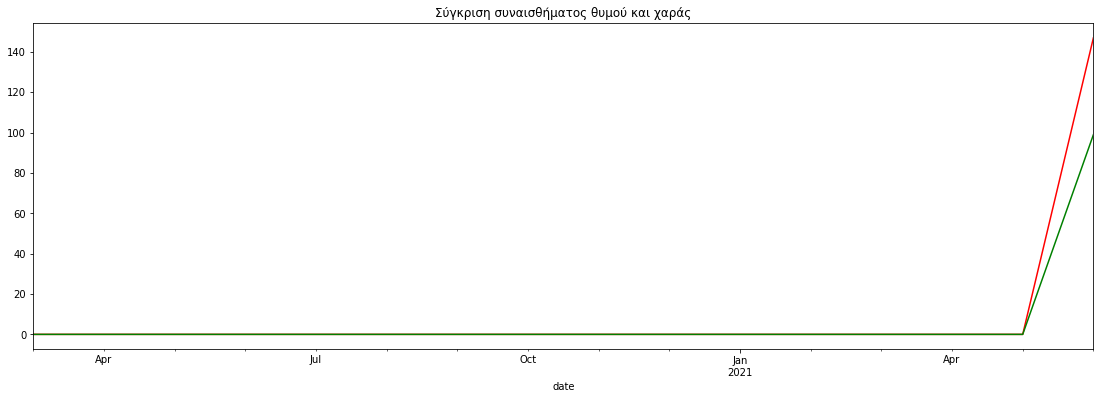

In [27]:
ax = df_covid_dates['anger'].resample('M').sum().plot(figsize=(19,6), color = 'red')
df_covid_dates['joy'].resample('M').sum().plot(figsize=(19,6), ax = ax, color = 'green')
plt.title('Σύγκριση συναισθήματος θυμού και χαράς')